In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mask_list = [ # Pr, elev, rh, p, wnd
    [1,1,1,1,1], 
    [1,0,1,1,1],
    [1,1,0,1,1],
    [1,1,1,0,1],
    [1,1,1,1,0],
    [0,1,1,1,0],
    [0,1,1,0,1],
    [0,1,0,1,1],
    [0,1,1,0,0],
    [0,1,0,0,1],
    [0,1,0,1,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1],
    [1,0,0,0,0],
    [0,0,0,0,0]
]

In [11]:
ds_ori = pd.DataFrame()
# ['mask', 'Yhat','Yhat_Scaled','RMSE']
ds_ori['Mask'] = np.arange(17)
ds_ori['Yhat'] = [-0.014, 0.138, -0.001, 0.116, 0.069, 0.069, 0.123, 0, 0.135, 0.098, 0.151, 0.215, 0.691, 0.427, 0.615, 0.782, 0.849]
ds_ori['Yhat_Scaled'] = [0.810, 1.711, 0.89, 1.581, 1.303, 1.298, 1.621, 0.894, 1.692, 1.473, 1.786, 2.163, 4.976, 3.418, 4.529, 5.511, 5.907]
ds_ori['RMSE'] = [2.623, 5.35, 3.13, 4.945, 3.617, 3.604, 5.01, 3.128, 5.191, 5.252, 4.574, 6.021, 10.673, 8.363, 9.557, 12.211, 13.035]
ds_ori

,Mask,Yhat,Yhat_Scaled,RMSE
0,0,-0.014,0.810,2.623
1,1,0.138,1.711,5.350
2,2,-0.001,0.890,3.130
3,3,0.116,1.581,4.945
4,4,0.069,1.303,3.617
5,5,0.069,1.298,3.604
6,6,0.123,1.621,5.010
7,7,0.000,0.894,3.128
8,8,0.135,1.692,5.191
9,9,0.098,1.473,5.252


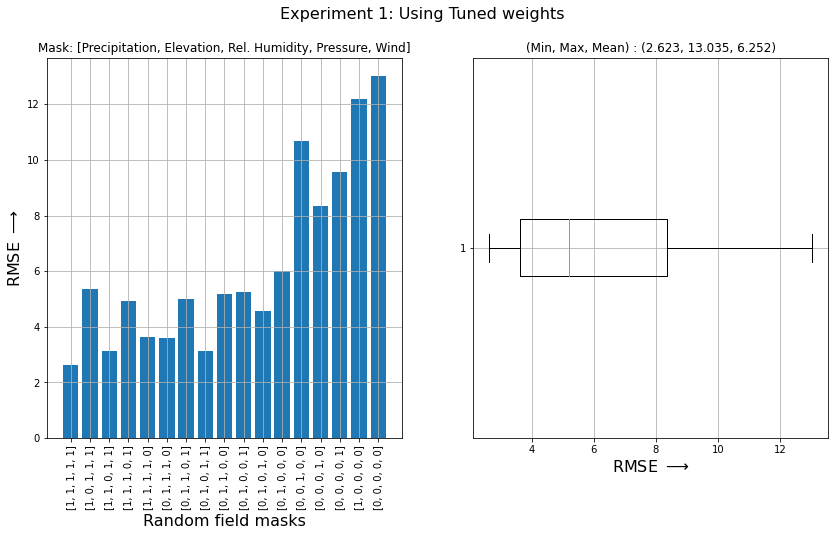

In [76]:
fig, ax = plt.subplots(1,2, figsize = (14,7))
ax[0].bar(ds_ori['Mask'],ds_ori['RMSE'])
ax[0].set_xticks(ticks = np.arange(17), labels = [str(x) for x in mask_list], rotation = 90)
ax[0].set_xlabel(r"Random field masks", fontsize = 16)
ax[0].set_ylabel(r"RMSE $\longrightarrow$", fontsize = 16)
ax[0].set_title('Mask: [Precipitation, Elevation, Rel. Humidity, Pressure, Wind]')
ax[0].grid()

ax[1].boxplot(ds_ori['RMSE'], vert = False)
ax[1].set_title(f"(Min, Max, Mean) : ({round(np.nanmin(ds_ori['RMSE']),3)}, {round(np.nanmax(ds_ori['RMSE']),3)}, {round(np.nanmean(ds_ori['RMSE']),3)})")
ax[1].set_xlabel(r"RMSE $\longrightarrow$", fontsize = 16)
ax[1].grid()

plt.suptitle("Experiment 1: Using Tuned weights \n", fontsize = 16)

plt.show()

In [56]:
ds_mod = pd.DataFrame()
# ['mask', 'Yhat','Yhat_Scaled','RMSE']
ds_mod['Mask'] = np.arange(17)
ds_mod['Yhat'] = [-0.051, -0.039, -0.065, -0.026, -0.112, -0.078, 0.018, -0.087, -0.065, -0.094, -0.133, -0.142, 0.01, -0.13, -0.06, -0.132, -0.133]
ds_mod['Yhat_Scaled'] = [0.594, 0.66, 0.507, 0.74, 0.234, 0.433, 0.998, 0.381, 0.51, 0.341, 0.107, 0.054, 0.953, 0.125, 0.538, 0.113, 0.111]
ds_mod['RMSE'] = [3.312, 3.416, 3.318, 3.699, 3.19, 3.32, 3.755, 3.111, 3.567, 3.211, 3.059, 3.074, 3.889, 3.028, 3.242, 3.07, 3.064]
ds_mod

,Mask,Yhat,Yhat_Scaled,RMSE
0,0,-0.051,0.594,3.312
1,1,-0.039,0.660,3.416
2,2,-0.065,0.507,3.318
3,3,-0.026,0.740,3.699
4,4,-0.112,0.234,3.190
5,5,-0.078,0.433,3.320
6,6,0.018,0.998,3.755
7,7,-0.087,0.381,3.111
8,8,-0.065,0.510,3.567
9,9,-0.094,0.341,3.211


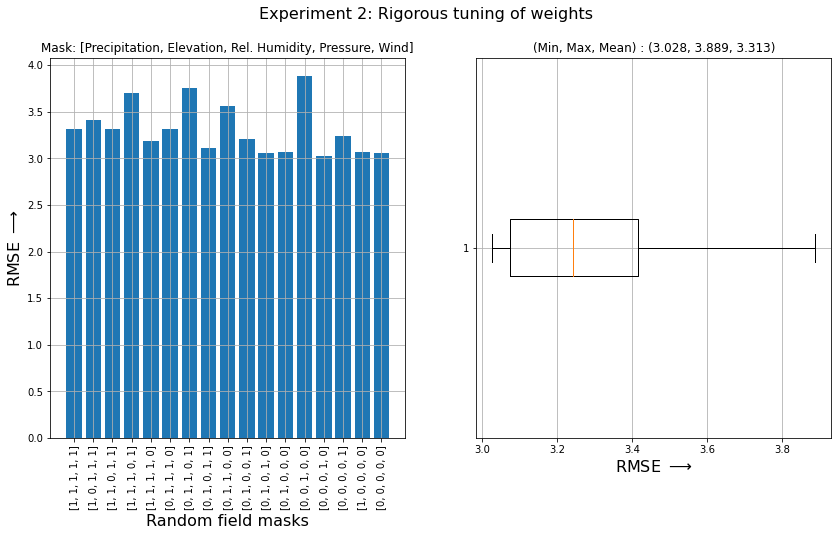

In [79]:
fig, ax = plt.subplots(1,2, figsize = (14,7))
ax[0].bar(ds_mod['Mask'],ds_mod['RMSE'])
ax[0].set_xticks(ticks = np.arange(17), labels = [str(x) for x in mask_list], rotation = 90)
ax[0].set_xlabel(r"Random field masks", fontsize = 16)
ax[0].set_ylabel(r"RMSE $\longrightarrow$", fontsize = 16)
ax[0].set_title('Mask: [Precipitation, Elevation, Rel. Humidity, Pressure, Wind]')
ax[0].grid()

ax[1].boxplot(ds_mod['RMSE'], vert = False)
ax[1].set_title(f"(Min, Max, Mean) : ({round(np.nanmin(ds_mod['RMSE']),3)}, {round(np.nanmax(ds_mod['RMSE']),3)}, {round(np.nanmean(ds_mod['RMSE']),3)})")
ax[1].set_xlabel(r"RMSE $\longrightarrow$", fontsize = 16)
ax[1].grid()

plt.suptitle("Experiment 2: Rigorous tuning of weights \n", fontsize = 16)

plt.show()